# CHARTING Charting the Path to Sustainability: Integrating Land Sector Data with SDGs

### Land sector management and Exploratory Data Analysis (EDA)

#### COUNTRY: NIGERIA

#### BRIEF INTRODUCTION OF NIGERIA


Nigeria which is officially known as the Federal Republic of Nigeria, is a diverse and populous country located in West Africa. It is often referred to as the "Giant of Africa" due to its large population and influential role on the continent. Nigeria has a rich history, cultural heritage, and a significant presence in the global community. Nigeria is situated in West Africa and shares its borders with several countries, including Benin to the west, Niger to the north, Chad to the northeast, and Cameroon to the east. To the south, it is bordered by the Gulf of Guinea, which provides access to the Atlantic Ocean. 

It is characterized by its ethnic and cultural diversity, with over 250 distinct ethnic groups and languages, the largest of which are the Hausa, Yoruba, and Igbo.

Nigeria helps in boasting the economy of Africa. Nigeria is a major oil producer, with petroleum exports playing a significant role in the country's economy. However, the Nigerian economy is diverse, with sectors like agriculture, manufacturing, and services contributing to its growth. 

Abuja IS the capital of Nigeria, plays a pivotal role in the governance and administration of the country. It serves as the political and administrative center, contributing to Nigeria's status as a key player in the African and global arenas.

In [1]:
#import libraries
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
%matplotlib inline
import json
import zipfile

#### ADMINSTRATIVE

##### BOUNDARY DATASET

In [2]:
#Read and load the json file
with open("C:/Users/adere/OneDrive/Documents/NGA_AL2_Nigeria.json") as file:
    geospatial_boundary = json.load(file)

In [3]:
#Create a GeoDataFrame from the geospatial_boundary data
Nga_boundary_data =gpd.GeoDataFrame.from_features(geospatial_boundary['features'])

In [4]:
Nga_boundary_data

,geometry,country,ISO3166_2,name,enname,locname,offname,boundary,adminlevel,wikidata,wikimedia,timestamp
0,"MULTIPOLYGON (((6.44714 4.30935, 6.44678 4.309...",NGA,,Nigeria,Nigeria,Nigeria,,administrative,2,Q1033,en:Nigeria,2019-09-18 23:02:02


In [5]:
#Read and load the json file
with open("C:/Users/adere/Downloads/NGA_ALL_statess.json") as file:
    all_nga_states =json.load(file)

In [6]:
#Create a GeoDataFrame from the all_nga_states data
nga_states =gpd.GeoDataFrame.from_features(all_nga_states['features'])

In [7]:
nga_states.head(5)

,geometry,country,ISO3166_2,name,enname,locname,offname,boundary,adminlevel,wikidata,wikimedia,timestamp
0,"POLYGON ((7.14043 4.90063, 7.14375 4.89561, 7....",NGA,NG-AB,Abia,null,Abia,,administrative,4,Q320852,en:Abia State,2019-09-18 23:02:02
1,"POLYGON ((11.34152 8.01867, 11.34614 8.01523, ...",NGA,NG-AD,Adamawa,null,Adamawa,,administrative,4,Q337514,en:Adamawa State,2019-02-26 10:52:47
2,"MULTIPOLYGON (((8.34338 4.60775, 8.34325 4.607...",NGA,NG-AK,Akwa Ibom,null,Akwa Ibom,,administrative,4,Q424388,en:Akwa Ibom State,2019-09-19 22:03:02
3,"POLYGON ((6.63362 5.73004, 6.65089 5.72511, 6....",NGA,NG-AN,Anambra,null,Anambra,,administrative,4,Q117714,en:Anambra State,2019-02-26 10:52:47
4,"POLYGON ((8.74922 10.44070, 8.75362 10.43965, ...",NGA,NG-BA,Bauchi,null,Bauchi,,administrative,4,Q503936,en:Bauchi State,2019-02-26 10:52:47


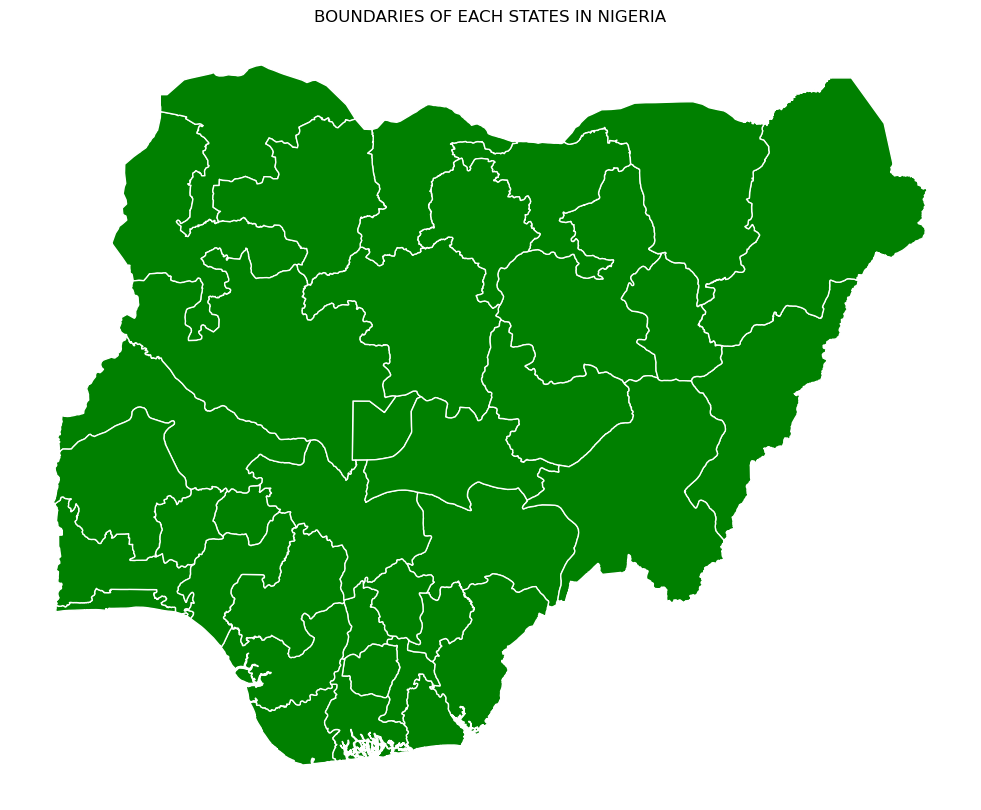

In [8]:
# Create plot
fig, ax = plt.subplots(figsize=(20, 10))

# Plot the boundary of states in Nigeria
nga_states.plot(ax=ax, color="green", edgecolor="white")

plt.title("BOUNDARIES OF EACH STATES IN NIGERIA")

plt.axis('off')
plt.show()

##### ROAD DATASET

In [9]:
#Read and load json file
with open("C:/Users/adere/OneDrive/Documents/Project/moja project/Land_Sector_Datasets/Global Roads Open Access Data Set.json") as file:
    geospatial_rd = json.load(file)

In [10]:
#creating GeoDataFrame from the data geospatial_rd data
road_data = gpd.GeoDataFrame.from_features(geospatial_rd['features'])

In [11]:
road_data.head(2)

,geometry,OBJECTID,ONME,FCLASS,SRFTPE,ISSEASONAL,CURNTPRAC,GDWTHRPRAC,SUM_LENGTH_KM
0,"LINESTRING (-66.82451 17.98029, -66.82455 17.9...",1,None,0,0.0,0.0,NaN,NaN,16686.65607
1,"LINESTRING (-66.62012 17.98131, -66.62126 17.9...",2,None,0,0.0,0.0,NaN,NaN,16686.65607


In [12]:
# Clip the road data to match Nigeria's boundary
Nga_road = gpd.clip(road_data, Nga_boundary_data)

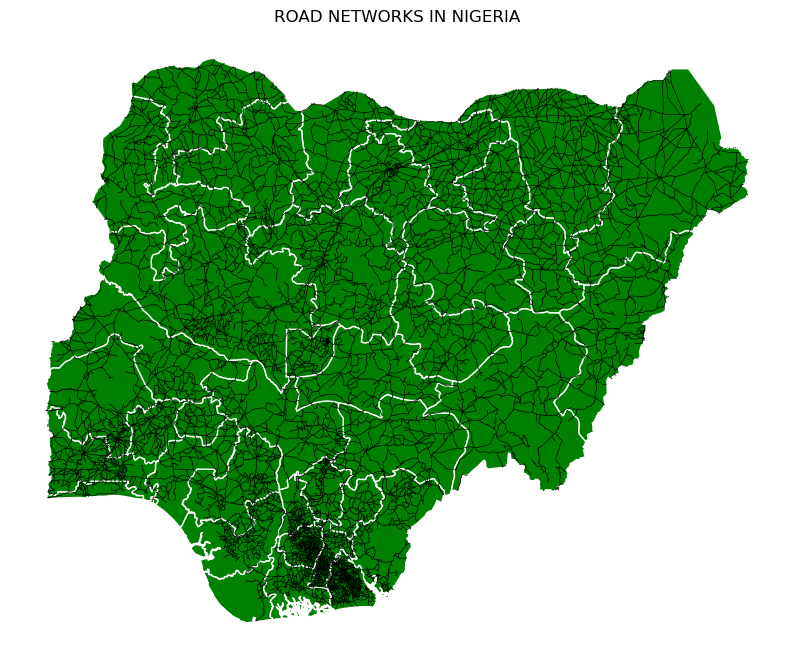

In [13]:
# Create plot
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the boundary of Nigeria
nga_states.plot(ax=ax, color="green", edgecolor="white")

# Plot the road network
Nga_road.plot(ax=ax, color="black", linewidth=0.5)

plt.title("ROAD NETWORKS IN NIGERIA")

plt.axis('off')
plt.show()

#### BIOCLIMATIC AND ECOLOGICAL ZONES

##### ECOLOGICAL ZONE 

In [14]:
#Read and load the json file
with open("C:/Users/adere/Downloads/NGA_AL2_Nigeria_GEZ.json") as file:
    ecological_zone = json.load(file)

In [15]:
#Create a GeodataFrame from the ecological zone data
ecological_zone =gpd.GeoDataFrame.from_features(ecological_zone['features'])

In [16]:
ecological_zone.head(5)

,geometry,country,ISO3166_2,name,gez_name,gez_code,gez_abbrev,adminlevel
0,"POLYGON ((4.17387 12.70964, 3.91224 12.72630, ...",NGA,,Nigeria,Tropical dry forest,13,TAwb,2
1,"POLYGON ((6.12077 12.05414, 6.01167 12.05684, ...",NGA,,Nigeria,Tropical moist forest,12,TAwa,2
2,"MULTIPOLYGON (((12.00401 7.51347, 12.00703 7.5...",NGA,,Nigeria,Tropical mountain system,16,TM,2
3,"MULTIPOLYGON (((6.72261 4.40102, 6.72370 4.401...",NGA,,Nigeria,Tropical rainforest,11,TAr,2
4,"POLYGON ((5.83178 13.76125, 5.78032 13.78030, ...",NGA,,Nigeria,Tropical shrubland,14,TBSh,2


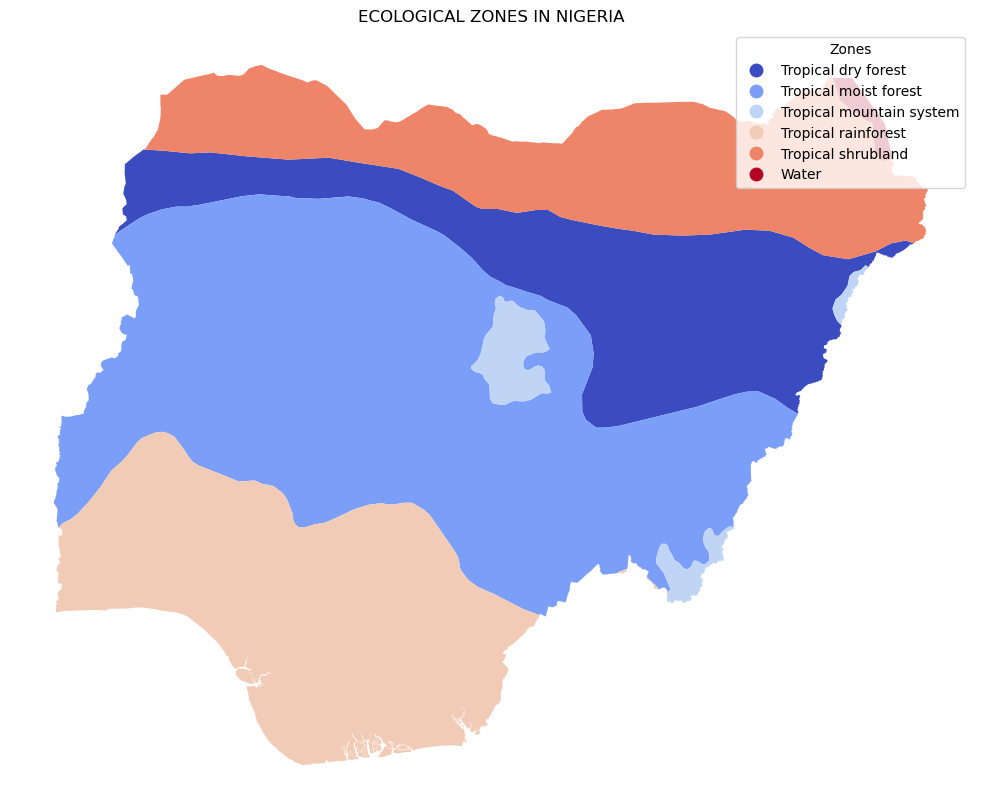

In [17]:
#create figures and axis
fig, ax = plt.subplots(figsize=(20, 10))

# Plot the ecological zones
ecological_zone.plot(column='gez_name', cmap='coolwarm', linewidth=2, ax=ax, legend=True)

# Customize the legend
ax.set_title("ECOLOGICAL ZONES IN NIGERIA")
legend = ax.get_legend()
legend.set_title("Zones")

# Show the plot
plt.axis('off')
plt.show()

In [18]:
file_path = "C:/Users/adere/OneDrive/Documents/WDPA_WDOECM_wdpa_gdb_polygons.shp"

In [19]:
# Read the SHP file
agroecology = gpd.read_file(file_path)

# Convert to GeoJSON and save to a file
agroecology.to_file('agroecology.json', driver='GeoJSON')

In [20]:
agroecology.head(5)

,geometry
0,"MULTIPOLYGON (((160.49655 55.17709, 160.49907 ..."
1,"POLYGON ((49.30487 55.36806, 49.30433 55.37184..."
2,"POLYGON ((31.21795 68.03481, 31.22037 68.04568..."
3,"POLYGON ((39.76143 51.92728, 39.75933 51.92152..."
4,"POLYGON ((92.44312 52.63276, 92.44612 52.63406..."


### ClIMATE

In [21]:
with open("C:/Users/adere/OneDrive/Documents/1901-1925.geojson") as file:
    climate = json.load(file)

In [22]:
climatic_data = gpd.GeoDataFrame.from_features(climate['features'])

In [23]:
climatic_data.head(5)

,geometry,OBJECTID,ID,GRIDCODE,Shape_Length,Shape_Area
0,"POLYGON ((-37.50000 83.50000, -37.50000 84.000...",1,1,62,2.0,0.25
1,"POLYGON ((-29.50000 83.50000, -29.50000 84.000...",2,2,62,16.0,3.75
2,"POLYGON ((-46.00000 83.00000, -44.00000 83.000...",3,3,62,5.0,1.00
3,"POLYGON ((-42.50000 83.50000, -42.50000 83.000...",4,4,62,7.0,1.50
4,"POLYGON ((-75.50000 81.00000, -75.50000 81.500...",5,5,62,3.0,0.50


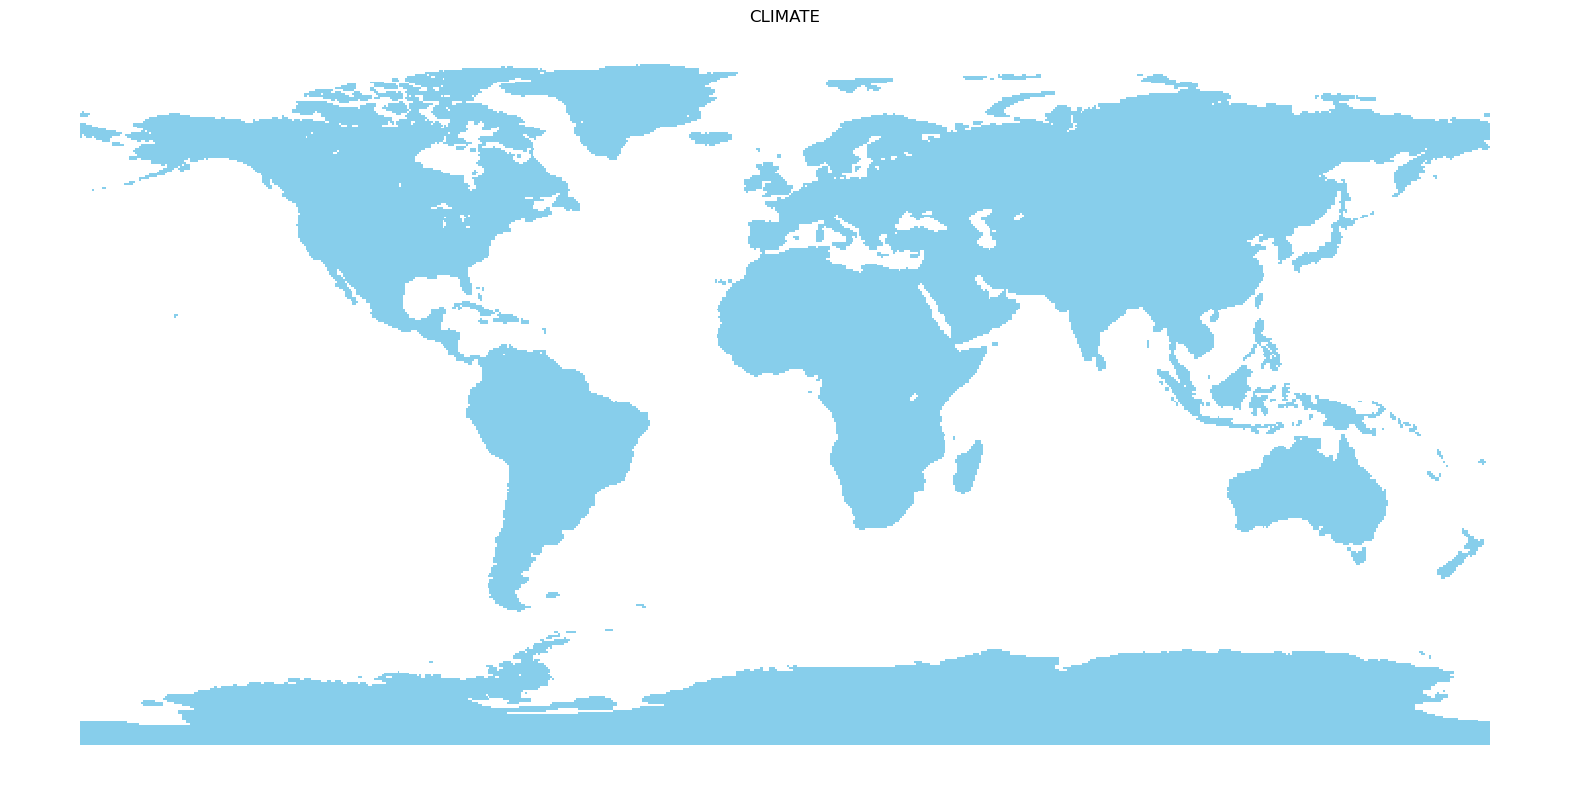

In [24]:
# Create plot
fig, ax = plt.subplots(figsize=(20, 10))

# Plot the global climate data
climatic_data.plot(ax=ax, color=(135/255, 206/255, 235/255))

plt.title("CLIMATE")

plt.axis('off')
plt.show()

In [25]:
#Read and load json file
with open ('C:/Users/adere/Downloads/NGA_Nigeria_SDPT.json') as file:
    forest_data = json.load(file)

In [26]:
#create GeoDataFrame from the forest_data
forest = gpd.GeoDataFrame.from_features(forest_data['features'])

In [27]:
forest.head(5)

,geometry,final_id,iso,country,org_name,common_name,species,species_simp,plant_ag,timber_ag,ever_dec,conifer_broad,hard_soft,size,source,year
0,"POLYGON ((6.73408 5.07584, 6.73217 5.09476, 6....",NGA_0,NGA,Nigeria,oil palm,Oil Palm,Elaeis guineensis,Oil Palm,Tree crops,Tree crops,n/a,n/a,n/a,Unknown,WRI,2013-2015
1,"POLYGON ((6.93543 5.18647, 6.90801 5.18638, 6....",NGA_0,NGA,Nigeria,oil palm,Oil Palm,Elaeis guineensis,Oil Palm,Tree crops,Tree crops,n/a,n/a,n/a,Unknown,WRI,2013-2015
2,"POLYGON ((6.82456 5.30529, 6.82322 5.30431, 6....",NGA_0,NGA,Nigeria,oil palm,Oil Palm,Elaeis guineensis,Oil Palm,Tree crops,Tree crops,n/a,n/a,n/a,Unknown,WRI,2013-2015
3,"POLYGON ((6.82203 5.31630, 6.82144 5.31719, 6....",NGA_0,NGA,Nigeria,oil palm,Oil Palm,Elaeis guineensis,Oil Palm,Tree crops,Tree crops,n/a,n/a,n/a,Unknown,WRI,2013-2015
4,"POLYGON ((6.78512 5.32028, 6.78444 5.32236, 6....",NGA_0,NGA,Nigeria,oil palm,Oil Palm,Elaeis guineensis,Oil Palm,Tree crops,Tree crops,n/a,n/a,n/a,Unknown,WRI,2013-2015


In [28]:
#Read and load json file
with open("C:/Users/adere/Downloads/NGA_AL2_Nigeria_WSR.json") as file:
    soil = json.load(file)

In [29]:
#Craete a GeoDaaFrame from the soil data
nga_soil = gpd.GeoDataFrame.from_features(soil['features'])

In [30]:
nga_soil.head(5)

,geometry,country,ISO3166_2,name,SNAME,mg_code,IPCC,adminlevel
0,"MULTIPOLYGON (((11.51913 6.61454, 11.51960 6.6...",NGA,,Nigeria,AC,23,Acrisol,2
1,"POLYGON ((5.83178 13.76125, 5.78032 13.78030, ...",NGA,,Nigeria,AR,3,Arenosol,2
2,"MULTIPOLYGON (((6.44714 4.30935, 6.44678 4.309...",NGA,,Nigeria,FL,20,Fluvisol,2
3,"MULTIPOLYGON (((13.93739 12.53061, 13.88475 12...",NGA,,Nigeria,GL,7,Gleysol,2
4,"POLYGON ((7.17539 11.91021, 7.11702 12.00231, ...",NGA,,Nigeria,LX,6,Lixisol,2


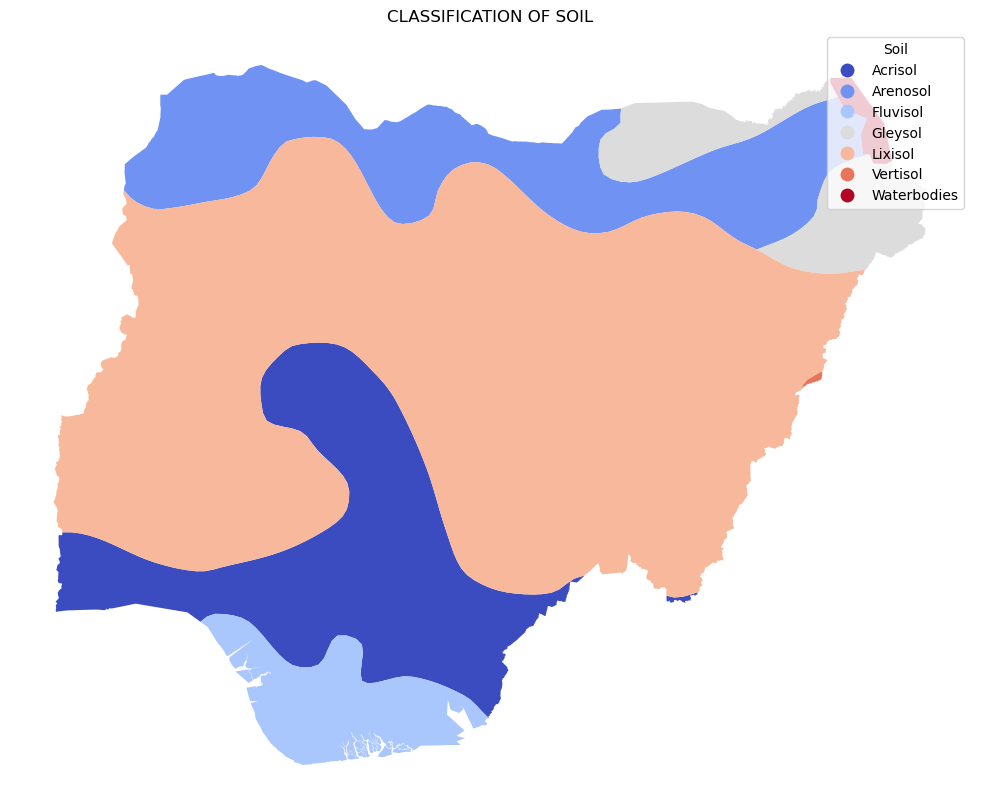

In [31]:
#create figures and axis
fig, ax = plt.subplots(figsize=(20, 10))

# Plot the soil data
nga_soil.plot(column='IPCC', cmap='coolwarm', linewidth=2, ax=ax, legend=True)

# Customize the legend
ax.set_title("CLASSIFICATION OF SOIL")
legend = ax.get_legend()
legend.set_title("Soil")

# Show the plot
plt.axis('off')
plt.show()

In [32]:
#Read and load json file
with open("C:/Users/adere/Downloads/NGA_AL4_Ogun_GEZ.json") as file:
    ogun_state_boundary =json.load(file)

In [33]:
#Craete a GeoDataFrame from the ogun_state_boundary data
ogun_boundary = gpd.GeoDataFrame.from_features(ogun_state_boundary['features'])

In [34]:
ogun_boundary.head(10)

,geometry,country,ISO3166_2,name,gez_name,gez_code,gez_abbrev,adminlevel
0,"POLYGON ((3.01685 7.73828, 3.01732 7.73946, 3....",NGA,NG-OG,Ogun,Tropical moist forest,12,TAwa,4
1,"POLYGON ((4.08836 7.13345, 4.08511 7.13188, 4....",NGA,NG-OG,Ogun,Tropical rainforest,11,TAr,4


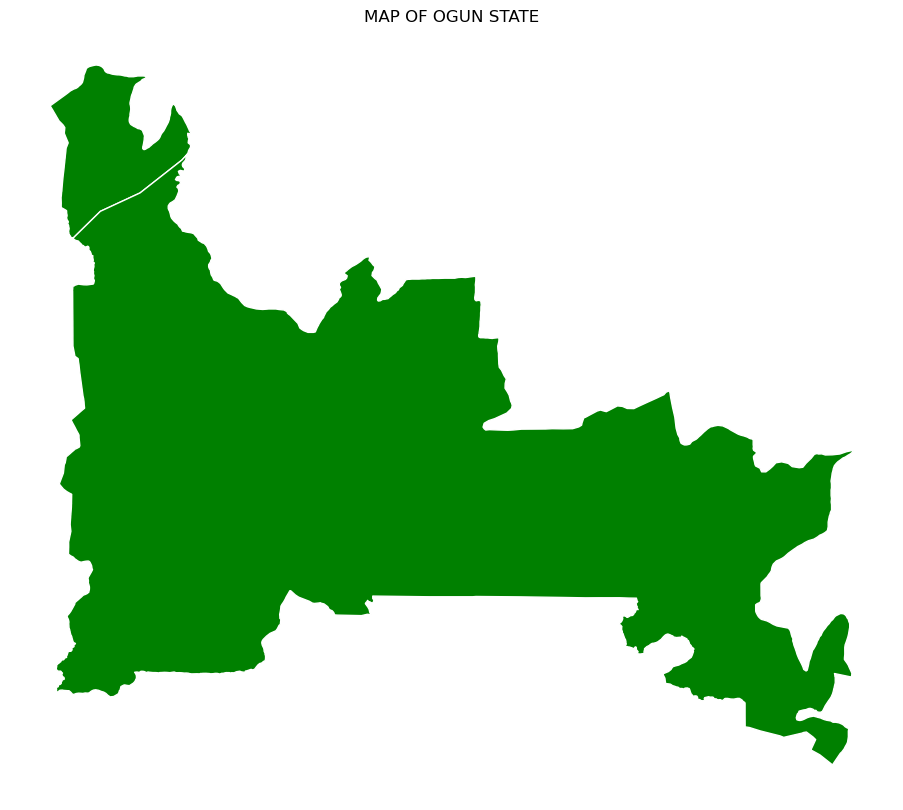

In [35]:
# Create plot
fig, ax = plt.subplots(figsize=(20, 10))

# Plot the boundary of Ogun state
ogun_boundary.plot(ax=ax, color="green", edgecolor="white")

plt.title("MAP OF OGUN STATE")

plt.axis('off')
plt.show()

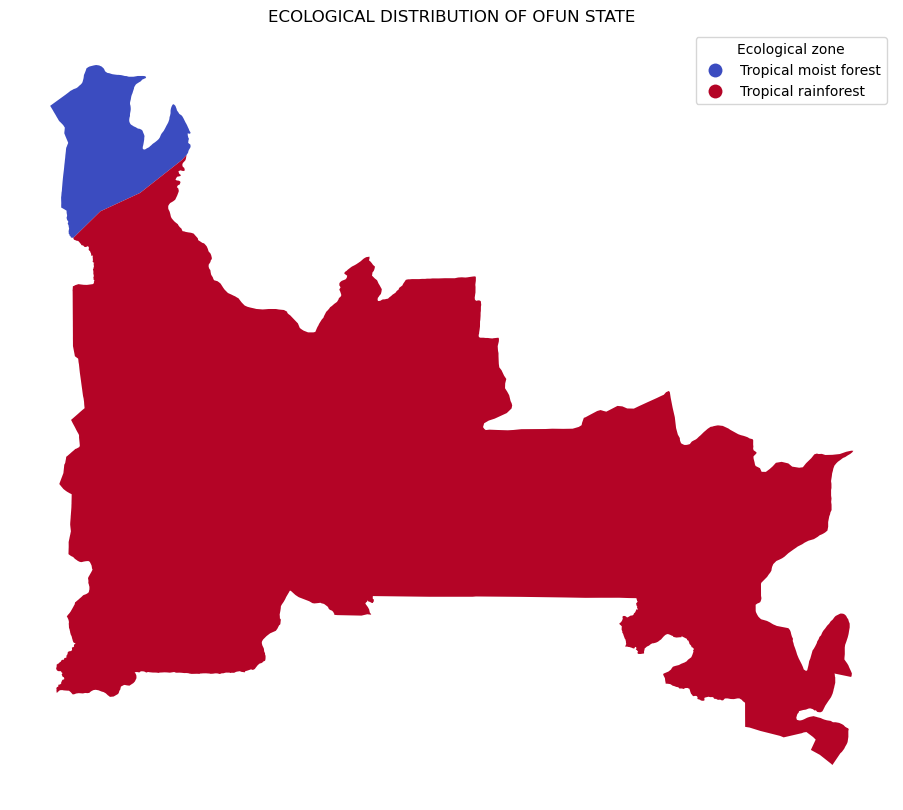

In [36]:
#create figures and axis
fig, ax = plt.subplots(figsize=(20, 10))

# Plot the ecological zones
ogun_boundary.plot(column='gez_name', cmap='coolwarm', linewidth=2, ax=ax, legend=True)

# Customize the legend
ax.set_title("ECOLOGICAL DISTRIBUTION OF OFUN STATE")
legend = ax.get_legend()
legend.set_title("Ecological zone")

# Show the plot
plt.axis('off')
plt.show()

### INSIGHTS

Nigeria has an explicit geographical boundary that seperates it from neighboring countries. This shows a demarcation of the country's territory.Nigeria is divided into 36 states and each of this states has  its own distinct boundaries. These administrative divisions helps in the organization and governance of the country.

Nigeria has a comprehensive road network that connects the urban and rural areas. This road network is vital for transportation, enabling people and goods to move within the different regions of the country.

Climatic changes have a global impact, including Nigeria. Variations in climate patterns has effect on weather condition, agriculture, and the environment at large. This climate changes is a critical issue that requires attention to mitigate its effects.

Oil palm is a major agricultural and economic resource in Nigeria. Nigeria is one of the world's leading producers of palm oil. The production of oil palm contributes significantly to the national economy.

Ecological zones in Nigeria -tropical dry forest, tropical moist forest, tropical mountain system, tropical rainforest, tropical shrubland, and water has unique characteristics and can have different impacts on economic value, biodiversity, and soil fertility. 

Nigeria has various soil classes such as Arenosol, Acrisol, Greysol, Lixisol, vertisol and Fluvisol. Each soil class with its characteristics. "Lixisol" is the dominant soil class, which may influence land use and agriculture. Different soil types are suitable for various crops and land use purposes.

Ogun State is situated in the southwestern part of Nigeria, it is bordered by Lagos State to the south, Oyo State to the north, Republic of Benin to the west, and Ondo State to the east. It is strategically located within the Yoruba-speaking region of Nigeria. Ogun State is a significant economic hub in Nigeria. It is known for its industrial and commercial activities, including manufacturing, agriculture, and trade.

Ogun State, located in southwestern Nigeria, is characterized by its rich natural heritage and diverse ecosystems. One of the prominent features of Ogun State is its dominance by the tropical rainforest biome.

##### Abundant Vegetation: 

Ogun State is renowned for its lush and dense tropical rainforest vegetation. This biome is characterized by towering trees with broad leaves, vines, and a variety of plant species. The region's climate, with abundant rainfall throughout the year, provides ideal conditions for the growth of these rainforest species.

##### Biodiversity

Ogun State is renowned for its lush and dense tropical rainforest vegetation. This biome is characterized by towering trees with broad leaves, vines, and a variety of plant species. The region's climate, with abundant rainfall throughout the year, provides ideal conditions for the growth of these rainforest species.

### CONCLUSION

Nigeria's geographical diversity, economic activities, environmental challenges, and natural resources all play a role in shaping the nation's identity and its relevance globally. Addressing environmental issues, sustainable land use, and the preservation of unique ecosystems like the tropical rainforest in Ogun State are crucial for Nigeria's long-term prosperity and well-being.